In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
avocado_df = pd.read_csv("data/avocado.csv")
avocado_df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


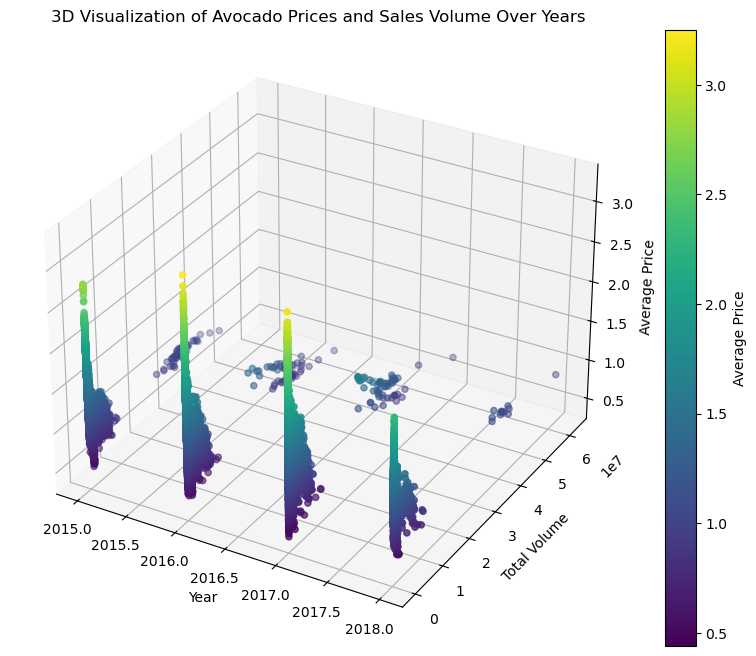

In [13]:
# Convert 'Date' to datetime to extract the year if needed
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])
avocado_df['Year'] = avocado_df['Date'].dt.year

# Preparing the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting
sc = ax.scatter(xs=avocado_df['Year'], ys=avocado_df['Total Volume'], zs=avocado_df['AveragePrice'], c=avocado_df['AveragePrice'], cmap='viridis')

ax.set_xlabel('Year')
ax.set_ylabel('Total Volume')
ax.set_zlabel('Average Price')

# Color bar which maps values to colors
plt.colorbar(sc, label='Average Price')

plt.title('3D Visualization of Avocado Prices and Sales Volume Over Years')
plt.show()

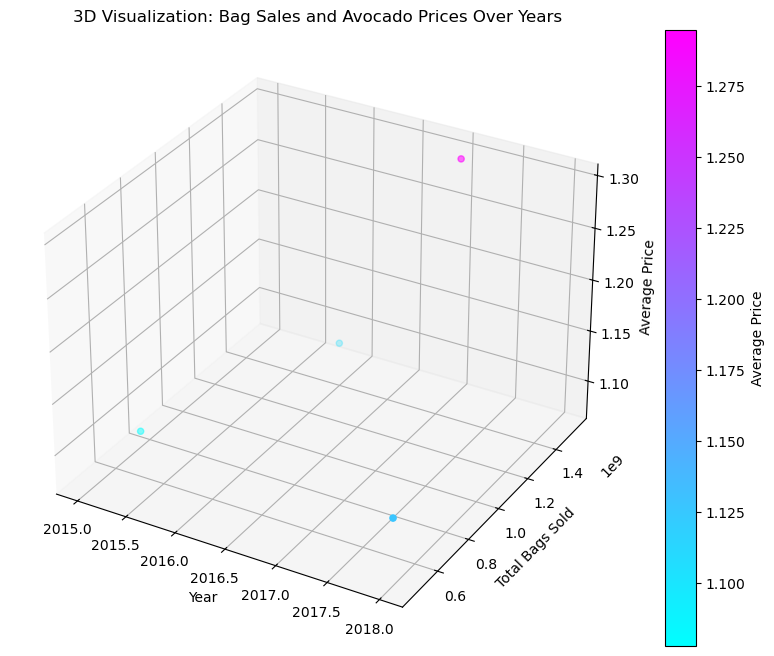

In [15]:
# Filtering the data to focus on a single type of avocado and summarizing by year
filtered_df = avocado_df[avocado_df['type'] == 'conventional'].groupby('Year').agg({
    'Total Bags': 'sum',
    'AveragePrice': 'mean'
}).reset_index()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Using 'Total Bags' as Y, 'Year' as X, and 'AveragePrice' as Z
sc = ax.scatter(xs=filtered_df['Year'], ys=filtered_df['Total Bags'], zs=filtered_df['AveragePrice'], c=filtered_df['AveragePrice'], cmap='cool')

ax.set_xlabel('Year')
ax.set_ylabel('Total Bags Sold')
ax.set_zlabel('Average Price')

plt.colorbar(sc, label='Average Price')

plt.title('3D Visualization: Bag Sales and Avocado Prices Over Years')
plt.show()

creating map of us to show total sold in each region in the us

In [25]:
# Step 1: Calculate the average of the average prices for avocados sold in each region.
average_price_by_region = avocado_df.groupby('region')['AveragePrice'].mean().reset_index()

# Step 2: Assign Geographical Coordinates:
coordinates = {
    'Albany': (42.652580, -73.756233),
    'Atlanta': (33.7488, -84.3877),
    'BaltimoreWashington': (39.1776, -76.6684),
    'Boise': (43.6150, -116.2023),
    'Boston': (42.3601, -71.0589),
    'BuffaloRochester': (43.0215, -78.2436),
    'Charlotte': (35.2271, -80.8431),
    'Chicago': (41.8781, -87.6298),
    'CincinnatiDayton': (39.431, -84.3518),
    'Columbus': (39.9612, -82.9988),
    'DallasFtWorth': (32.7079, -96.9209),
    'Denver': (39.7392, -104.9903),
    'Detroit': (42.3314, -83.0458),
    'GrandRapids': (42.9634, -85.6681),
    'HarrisburgScranton': (40.8411, -76.2746),
    'HartfordSpringfield': (41.9325, -72.6377),
    'Houston': (29.7604, -95.3698),
    'Indianapolis': (39.7684, -86.1581),
    'Jacksonville': (30.3322, -81.6557),
    'LasVegas': (36.1716, -115.1391),
    'LosAngeles': (34.0549, -118.2426),
    'Louisville': (38.2527, -85.7585),
    'MiamiFtLauderdale': (25.9421, -80.1646),
    'Nashville': (36.1627, -86.7816),
    'NewOrleansMobile': (30.3237, -89.0557),
    'NewYork': (40.7128, -74.0060),
    'Orlando': (28.5384, -81.3789),
    'Philadelphia': (39.9526, -75.1652),
    'PhoenixTucson': (32.8512, -111.5241),
    'Pittsburgh': (40.4406, -79.9959),
    'Portland': (45.5152, -122.6784),
    'RaleighGreensboro': (35.9261, -79.2151),
    'RichmondNorfolk': (37.1958, -76.8610),
    'Roanoke': (37.2710, -79.9414),
    'Sacramento': (38.5816, -121.4944), 
    'SanDiego': (32.7157, -117.1611),
    'SanFrancisco': (37.7749, -122.4194),
    'Seattle': (47.6061, -122.3328),
    'SouthCarolina': (33.8361, -81.1637),
    'Spokane': (47.6580, -117.4235),
    'StLouis': (38.6270, -90.1994),
    'Syracuse': (43.0481, -76.1474),
    'Tampa': (27.9517, -82.4588),
    'WestTexNewMexico': (33.0304, -106.2549)
}

# Create a new DataFrame with the coordinates
coords_list = [{'region': region, 'latitude': coords[0], 'longitude': coords[1]}
               for region, coords in coordinates.items()]
coords_df = pd.DataFrame(coords_list)

# Merge the total volume data with the coordinates
merged_df = pd.merge(average_price_by_region, coords_df, on='region', how='inner')

merged_df

,region,AveragePrice,latitude,longitude
0,Albany,1.561036,42.65258,-73.756233
1,Atlanta,1.337959,33.74880,-84.387700
2,BaltimoreWashington,1.534231,39.17760,-76.668400
3,Boise,1.348136,43.61500,-116.202300
4,Boston,1.530888,42.36010,-71.058900
5,BuffaloRochester,1.516834,43.02150,-78.243600
6,Charlotte,1.606036,35.22710,-80.843100
7,Chicago,1.556775,41.87810,-87.629800
8,CincinnatiDayton,1.209201,39.43100,-84.351800
9,Columbus,1.252781,39.96120,-82.998800


In [26]:
import plotly.graph_objects as go

#scaling factor
merged_df['marker_size'] = merged_df['AveragePrice'] * 10

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=merged_df['longitude'],
    y=merged_df['latitude'],
    z=merged_df['AveragePrice'],
    mode='markers',
    marker=dict(
        size=merged_df['marker_size'],  
        color=merged_df['AveragePrice'],  
        colorscale='Viridis',
        opacity=0.8
    ),
    text=merged_df['region']  # Hover text
)])

fig.update_layout(
    title='3D Map of Average Avocado Profit by Selected US Regions',
    scene=dict(
        xaxis_title='Longitude',
        yaxis_title='Latitude',
        zaxis_title='Average Price'
    ),
    autosize=True,
)

fig.show()

do based of regions 2dmap of us

Regions:
- California
- West (WA, OR, ID, MT, WY, NV, UT, CO, AZ, NM)
- Plains (ND, SD, MN, NE, IA, KS, MO)
- Midsouth (KY, VA, TN, MD, NC, SC)
- Northeast (WV, MD, DE, NJ, CN, RI, MA, VT, NH, NY, PA, ME)
- Southeast (MS, AL, GA, FL)
- South Central (OK, AR, TX, LA)
- Great Lakes (WI, IL, IN, MI, OH)

In [27]:
# install these libraries 
import geopandas as gpd
import plotly.express as px

# Step 1: Define your state to region mapping
state_to_region = {
    'CA': 'California',
    # Add all states to their respective regions
}

# Step 2: Map each entry in your avocado dataset to one of these regions
avocado_df['region'] = avocado_df['state'].map(state_to_region)

# Step 3: Aggregate the sales data by these new regions
total_volume_by_custom_region = avocado_df.groupby('region')['Total Volume'].sum().reset_index()

# Load a GeoDataFrame with the USA administrative areas shapefile
gdf_usa = gpd.read_file('#add path')

# Step 4: Merge the aggregated data with the GeoDataFrame based on your custom regions

merged_gdf = gdf_usa.merge(total_volume_by_custom_region, left_on='NAME', right_on='region', how='left')

# Replace NaN values with 0 for regions that do not have matching avocado data
merged_gdf['Total Volume'].fillna(0, inplace=True)

# Step 5: Generate the 2D map using Plotly
fig = px.choropleth(merged_gdf,
                    geojson=merged_gdf.geometry,
                    locations=merged_gdf.index,
                    color='Total Volume',
                    color_continuous_scale='Viridis',
                    scope="usa",
                    labels={'Total Volume': 'Total Avocado Volume'},
                    hover_data=['Total Volume'])

# Enhance the layout
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the figure
fig.show()

ModuleNotFoundError: No module named 'geopandas'